In [51]:
# imports
import PIL
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

BATCH_SIZE = 4
NUM_WORK = 0
data_path = r'D:\python\Pytorch\data\hymenoptera_data'
LR = 0.001
MOMENTUM = 0.9
INPUT_SIZE = 224


# transforms


# datasets
trainset = torchvision.datasets.ImageFolder(os.path.join(data_path, 'train'), 
                                            transform=transforms.Compose(
                                                [transforms.RandomResizedCrop(INPUT_SIZE),
                                                 transforms.ToTensor(),
                                                 # transforms.Normalize((0.5,), (0.5))
                                                ]
                                            ))
testset = torchvision.datasets.ImageFolder(os.path.join(data_path, 'val'), 
                                            transform=transforms.Compose(
                                                [transforms.RandomResizedCrop(INPUT_SIZE),
                                                 transforms.ToTensor(),
                                                 # transforms.Normalize((0.5,), (0.5))
                                                ]
                                            ))

# helper function to show an image
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))  # BRG -> RGB

def get_mean_std(dataset, ratio=0.01, num_cal=1):
    """Get mean and std by sample ratio
    calculate the 'mean and std' by num_cal time and get the average
    """
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=int(len(dataset)*ratio), 
                                             shuffle=True, num_workers=0)
    mean = []
    std = []
    for i in range(num_cal):
        train = iter(dataloader).next()[0]   # 一个batch的数据
        mean.append(np.mean(train.numpy(), axis=(0,2,3)))
        std.append(np.std(train.numpy(), axis=(0,2,3)))
    mean = np.array(mean).mean(axis=0)
    std = np.array(std).mean(axis=0)
    return mean, std

train_mean, train_std = get_mean_std(trainset, num_cal=100)

test_mean, test_std = get_mean_std(testset, num_cal=100)

print(train_mean, train_std)
print(test_mean,test_std)


[0.52285635 0.47323307 0.35680503] [0.24659246 0.24461289 0.25081134]
[0.5064242  0.46006188 0.32295105] [0.22028105 0.19582503 0.19140401]


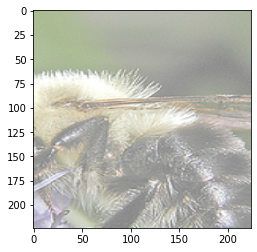

In [34]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

matplotlib_imshow(iter(train_loader).next()[0][0], one_channel=False)

In [38]:
a = np.arange(1, 7).reshape(2, 3)
a.mean(axis=0)


array([2.5, 3.5, 4.5])